<h1><center>INF285 - Computación Científica </center></h1>
<h1><center>Tarea 3</center></h1>
<h3><center>Claudia Hazard Valdés  <br> <br/> claudia.hazard.14@sansano.usm.cl <br><br/>              201404523-9</center></h3>  _Mayo 2017_

* [1.- Introducción](#Intro)
* [2.- Desarrollo y análisis de resultados](#Des)
    * [Descomposición en Valores Singulares](#Desc)
    * [Principal Component Analysis](#Pri)
* [3.- Conclusiones](#con)
* [4.- Referencias](#ref)

<div id='Intro' />
<h2>1. Introducción</h2>

Se ha realizado el uso de descomposición en valores singulares y el procesamiento de imagenes en RGB en forma de obtener información útil que pueda ser utilizada en el computador para realizar operaciones de comparación y reconstrucción en imagenes.


<div id='Des' />
<h2>2. Desarrollo y análisis de resultados.</h2>

In [1]:
from PIL import Image
import glob
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ipywidgets import widgets
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

<div id='Desc' />
          <h2> - Descomposición en Valores Singulares </h2>

<p style="font-size: 18px" > 1. </p>
Implementar el algoritmo PCA para proyectar los vectores de datos (imágenes en _pickle 1_) utilizando los 3 vectores asociados a los **valores singulares** que usted estime conveniente. ¿Por qué eligió esos vectores propios?


In [2]:
def newPCA(Matriz,e):
    #Primero se resta el promedio de cada columna a la matriz.
    prom=np.mean(Matriz,axis=0)
    Z = np.array([column - prom for column in Matriz])
    #Luego se realiza sigular value descomposition de la matriz Z que ha sido obtenida.
    U, E, Vt= np.linalg.svd(Z,full_matrices=False)
    #Se calcula el valor de V aplicando el transpuesto conjugado a V*.
    V=Vt.transpose().conjugate()[:,range(e)]
    #Al obtener V y Z solo es necesario aplicar el producto punto para obtener la matriz Y.
    Y=Z.dot(V)
    return Y
    
    

In [3]:
arch=pickle.load(open('pickle1.pkl','rb'))
pic=np.array(arch)
Matrix=[]
for i in pic:
    im = Image.fromarray(i).resize((100,100))
    im=np.asarray(im.getdata())
    imarray = np.array(im).reshape(-1)
    Matrix.append(im)
    
Matriz1 = np.asarray(Matrix)

#El PCA normalizado.
pkl1=newPCA(Matriz1,3)/255
print(pkl1)

[[ -5.62949689e+00  -2.92504596e+00  -1.60250572e+01]
 [  9.22058803e+00   9.93239323e+00  -3.38143844e+00]
 [  7.73988664e+00   9.89891582e+00  -3.39635238e+00]
 [  6.59429280e+00   9.58870005e+00  -2.24262461e+00]
 [  7.11436706e+00   9.87341763e+00  -2.24155956e+00]
 [  1.51805535e+01   8.89959112e+00  -1.10929196e+00]
 [  1.48137163e+01   8.66045073e+00  -1.26276744e+00]
 [  1.47668390e+01   8.21793656e+00  -1.94243963e+00]
 [  1.53289863e+01   8.08560113e+00  -5.76133891e-01]
 [  1.35450855e+01  -4.26782958e+00  -3.04821065e+00]
 [  1.33672008e+01  -4.40502725e+00  -2.43607839e+00]
 [  1.38194125e+01  -4.13741371e+00  -4.31413631e+00]
 [  1.36461196e+01  -4.20188682e+00  -3.87018201e+00]
 [  1.34671755e+01  -4.34169060e+00  -3.79264021e+00]
 [  1.34677604e+01  -4.39088084e+00  -3.56503250e+00]
 [  1.29324786e+01  -4.09310261e+00  -2.34431799e+00]
 [  1.28826867e+01  -4.29467859e+00  -2.24941192e+00]
 [  1.87907998e+01   1.79461861e-03  -2.68334685e-01]
 [  1.80705193e+01   4.44742

Al estar ordenada la matriz se eligen los primeros 3 vectores, ya que estos contienen los valores que con más información y de esta forma los mas significativos.

<div id='Pri' />
<h2> -   Principal Component Analysis </h2>

<p style="font-size: 18px" > 1. </p>
Utilizando las imágenes que están en el _pickle 2_, usted deberá encontrar los 5 vecinos más cercanos (esto quiere decir encontrar las 5 imágenes que estén a la menor norma **vectorial** euclidiana de nuestra imagen) para cada una de las imágenes utilizando los **vectores proyectados** obtenidos en la pregunta anterior. Usted deberá devolver los índices de las imágenes y las distancias ordenadas de menor a mayor, e ingresar estos números en la función que se encuentra a continuación. ¿Que puede decir acerca de los resultados? Concluya.

In [4]:
#Función que muestra las imagenes.
def show_image(dataset,indices,mean,original,distance):
    f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
    ax1.imshow(np.reshape(original*255 + mean[None,:],(100,100)), cmap='copper')
    ax2.imshow(np.reshape(dataset[indices[0],]*255 + mean[None,:],(100,100)), cmap='copper')
    ax3.imshow(np.reshape(dataset[indices[1],]*255 + mean[None,:],(100,100)), cmap='copper')
    ax4.imshow(np.reshape(dataset[indices[2],]*255 + mean[None,:],(100,100)), cmap='copper')
    ax5.imshow(np.reshape(dataset[indices[3],]*255 + mean[None,:],(100,100)), cmap='copper')
    ax6.imshow(np.reshape(dataset[indices[4],]*255 + mean[None,:],(100,100)), cmap='copper')
    ax1.set_title('Original')
    ax2.set_title('distancia '+str(distance[0]))
    ax3.set_title('distancia '+str(distance[1]))
    ax4.set_title('distancia '+str(distance[2]))
    ax5.set_title('distancia '+str(distance[3]))
    ax6.set_title('distancia '+str(distance[4]))
    plt.show()
    

Se crea la función cercania la cual retorna la norma euclidiana entre la diferencia de dos imagenes.

In [5]:
def cercania(img1,img2):
    #Se restan ambas matrices de imagenes para determinar la distancia de cada uno de sus 
    dist=img1-img2
    # Se busca la norma euclidiana entre la distancia de ambas imagenes.
    euclidiana=np.linalg.norm(dist)
    return euclidiana

La función crearlista, crea una lista de las imagenes que serán graficadas, esto se utilizará en la pregunta 4.  

In [6]:
def crearlista(dataset,indices,mean,original,distance):
    a1=np.reshape(dataset[indices[0],]*255 + mean[None,:],(100,100))
    a2=np.reshape(dataset[indices[1],]*255 + mean[None,:],(100,100))
    a3=np.reshape(dataset[indices[2],]*255 + mean[None,:],(100,100))
    a4=np.reshape(dataset[indices[3],]*255 + mean[None,:],(100,100))
    a5=np.reshape(dataset[indices[4],]*255 + mean[None,:],(100,100))
    l=np.array([a1,a2,a3,a4,a5])
    return l

Se abre el archivo pickle2 ya que el archivo pickle1 fue abierto en el ejercicio anterior, luego se concatenan las matrices 1 y 2 de imagenes de ambos archivos para trabajar mas facilmente con ellas.

In [16]:
arch=pickle.load(open('pickle2.pkl','rb'))
pic=np.array(arch)
Matrix=[]
for i in pic:
    im = Image.fromarray(i).resize((100,100))
    im=np.asarray(im.getdata())
    imarray = np.array(im).reshape(-1)
    Matrix.append(im)
    
Matriz2 = np.asarray(Matrix)
pkl2= newPCA(Matriz2,3)/255

data=np.concatenate((Matriz2, Matriz1), axis=0)
mean=np.mean(data,axis=0)
z=data-mean
z=z/255
Y=newPCA(data,3)/255

Se recorre la matriz Y obtenida con la funcion newPCA para la matriz z que corresponde a la concatenacion del pickle 1 y 2. Luego se obtiene la cercania de las imagenes y se muestras utilizando show_image.

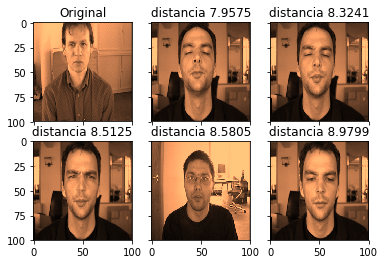

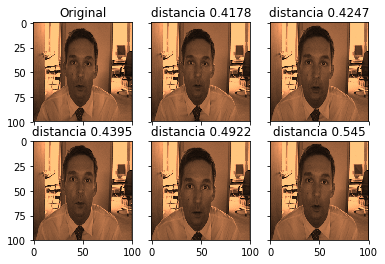

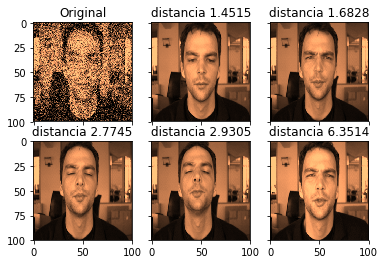

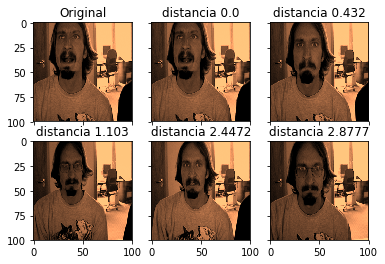

In [8]:
lalalist=[]
c1=0
for x in Y[:4]:
    l=[]
    c2=4
    for i in Y[4:]:
        l.append((round(cercania(x,i),4),c2))         #Agrega una tupla (distancia,posicion) a la lista l.
        c2+=1
    l.sort() # Se ordena la lista de tuplas l y se escogen las 5 distancias mas bajas.
    l=l[:5]
    show_image(z,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    lala=crearlista(z,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    lalalist.append(lala)
    c1+=1


De los resultados mostrados, se puede decir que para las imagenes 2,3 y 4 utilizando el PCA las imagenes mas cercanas son bastante parecidas, incluso el algoritmo detecta en el caso 4 una imagen que es completamente identica. Mientras que para la imagen 1 no existe en el pickle1 una imagen realmente parecida.  

<p style="font-size: 18px" > 2. </p>Reconstruir utilizando su data proyectada las 5 imágenes más cercanas encontradas en el ejercicio anterior. ¿Qué puede decir sobre estas imágenes? Concluya.

Para utilizar la data proyectada es necesario utilizar la matriz formada por la matriz Y obtenida anteriormente y la transpuesta conjugada de V. 

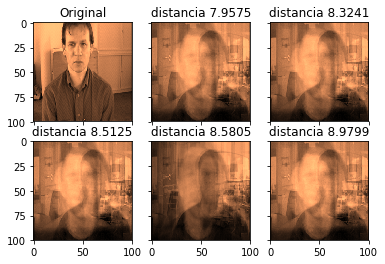

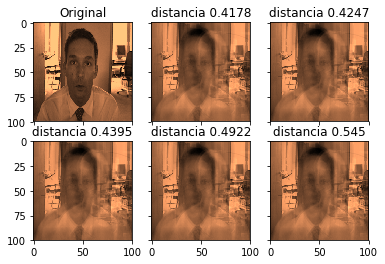

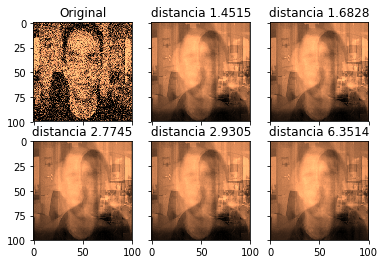

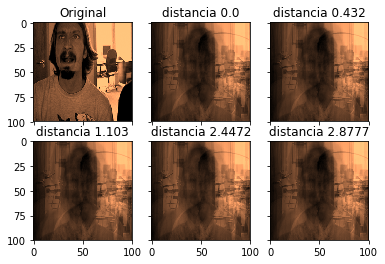

In [9]:
U, E, Vt= np.linalg.svd(z,full_matrices=False)
V=Vt.transpose().conjugate()[:,[0,1,2]]
nV=V.transpose().conjugate()
nZ=Y.dot(nV)
lalalist2=[]
c1=0
for x in Y[:4]:
    l=[]
    c2=4
    for i in Y[4:]:
        l.append((round(cercania(x,i),4),c2))
        c2+=1
    l.sort()
    show_image(nZ,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    l.sort()
    l=l[:5]
    lala2=crearlista(nZ,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    lalalist2.append(lala2)
    c1+=1


Las imagenes construidas a traves de la data proyectada tienen bastante ruido, no logran generar una imagen nitida esto es debido a la perdida de información al utilizar solo 3 vectores.

<p style="font-size: 18px" > 3. </p>

Volver a realizar el desarrollo de la pregunta 2 pero esta vez utilizando 10 vectores propios.

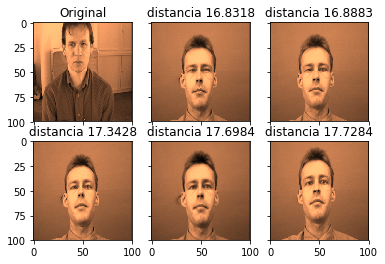

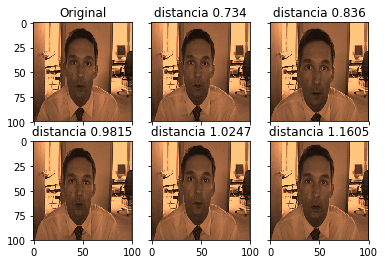

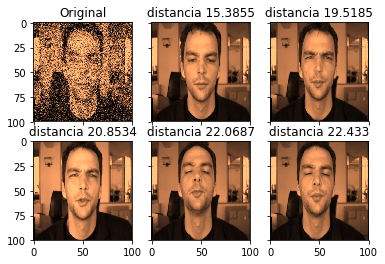

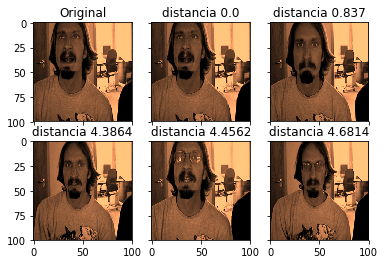

In [10]:
U, E, Vt= np.linalg.svd(z,full_matrices=False)
V=Vt.transpose().conjugate()[:,[0,1,2,3,4,5,6,7,8,9]]
nV=V.transpose().conjugate()
Y2=newPCA(data,10)/255
nZ2=Y2.dot(nV)
lalalist3=[]
c1=0
for x in Y2[:4]:
    l=[]
    c2=4
    for i in Y2[4:]:
        l.append((round(cercania(x,i),4),c2))
        c2+=1
    l.sort()
    l=l[:5]
    show_image(z,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    lala3=crearlista(z,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    lalalist3.append(lala3)  
    c1+=1


Al utilizar 10 vectores propios la distancia de las imagenes se vuelve mayor, esto debido a que es mas certero, ademas  algunas de las imagenes mas cercanas a la original son distintas a las realizadas con 3 vectores.

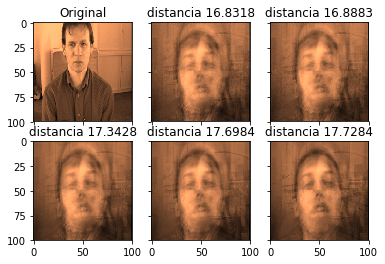

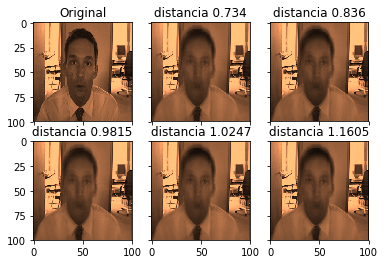

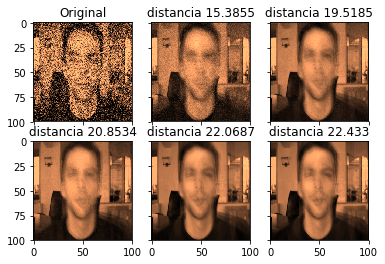

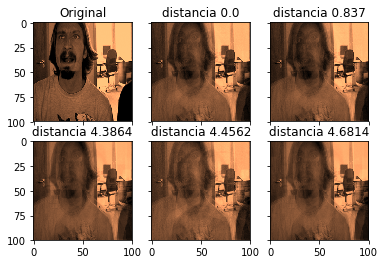

In [11]:
c1=0
lalalist4=[]
resultados2=[]
for x in Y2[:4]:
    l=[]
    c2=4
    for i in Y2[4:]:
        l.append((round(cercania(x,i),4),c2))
        c2+=1
    l.sort()
    l=l[:5]
    show_image(nZ2,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    lala4=crearlista(nZ2,[s[1] for s in l],mean,z[c1],[s[0] for s in l])
    lalalist4.append(lala4)
    c1+=1

Las imagenes formadas por 10 vectores reconstruidos es mucho mas nitida que la realizada por 3, esto se debe a que existe mas información con la cual reconstruir una imagen.

<p style="font-size: 18px" > 4. </p>

Utilizando las imágenes reconstruidas de la pregunta 2 y 3, calcular la norma del error entre las imágenes originales y las reconstruidas, utilizando la norma 2. ¿Existe alguna relación entre la norma euclideana obtenida anteriormente con la norma matricial obtenida acá? ¿Afecta la cantidad de vectores **singulares** utilizados? Concluya usando sus gráficos.

Se calcula la diferencia entre las matrices de las imagenes originales y reconstruidas en 2, agregandolos a la lista llamada nueva y los de las imagenes en 3 agregandolos a la lista nueva2.

In [12]:

#Imagenes originales y reconstruidas en 2.
diferencia=np.array(lalalist)-np.array(lalalist2)
nueva=[]
for matriz in diferencia:
    for m in matriz:
        nueva.append(np.linalg.norm(m))

        
        
#Imagenes originales y reconstruidas en 3.        
diferencia3=np.array(lalalist3)-np.array(lalalist4)
nueva2=[]
for matriz in diferencia3:
    for m in matriz:
        nueva2.append(np.linalg.norm(m))

# Se imprime la diferencia entre los errores de ambas imagenes.
print(np.array(nueva)-np.array(nueva2))
        

[ 2647.11562458  2759.68328069  2821.49851376  4312.00423081  2950.38090944
  2191.64772823  1725.98126781  1986.47630353  2558.57124475  2187.57796595
  2917.15390985  3311.13350399  2971.46563453  2719.11650371  2581.03785878
  2678.12341228  2653.91298662  2352.30666693  1596.18202717  1955.02927039]


Dado que la diferencia entre los errores de las imagenes reconstruidas con dimension 3 - dimension 10 es para toda imagen positiva, significa que el error de la dimension 10 es siempre menor que el error de la dimension 3.

Se grafican los datos para la matriz de tres dimensiones.

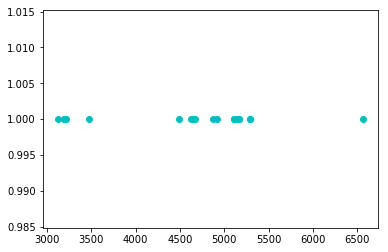

In [13]:
fig = plt.figure()
y=[]        
for i in nueva:
    y.append(1)
puntos = fig.add_subplot(111)
puntos.scatter(nueva, y, c='c', marker='o')
plt.show()

Se grafican los datos para la matriz de 10 dimensiones.

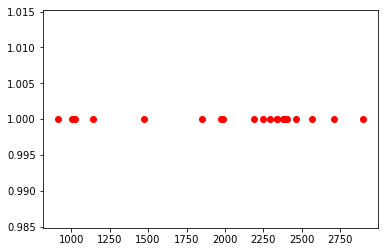

In [14]:
fig = plt.figure()
puntos = fig.add_subplot(111)
puntos.scatter(nueva2, y, c='r', marker='o')

Se grafican ambas funciones, para visualizar si existe algún comportamiento notorio entre ambas.

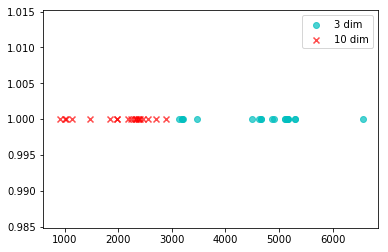

In [15]:
fig = plt.figure()
puntos = fig.add_subplot(111)
puntos.scatter(nueva, y, c='c', marker='o', label="3 dim",alpha=0.7)
puntos.scatter(nueva2, y, c='r', marker='x', label="10 dim",alpha=0.7)
plt.legend(loc="upper right")
plt.show()

Como se puede ver al graficar ambas normas de error entre las imagenes reconstruidas para 3 y 10 vectores, estas no se traslapan, por lo que para 10 dimensiones el error será mucho menor a usar 3 dimensiones. Esto concuerda con lo visto en clases pues al tener mas información significativa para realizar operaciones los errores son mas pequeños.

<div id='con' />
<h2>3. Conclusiones </h2>

Las imagenes se pueden descomponer en matrices de esta forma se puede descomponer en valores singulares y ordenar para utilizar la información mas importante de estos, mientras mayor sea la dimensión menor será el error relacionado a este en forma de reconstruir la imagen y mas certero será en cuanto a comparación entre matrices. Es por esto que las matemáticas pueden resultar sumamente útiles en el ambito computacional para disminuir operaciones, disminuir errores, mejorar los procesos de busquedas y comparaciones. 

<div id='ref' />
<h2>4. Referencias </h2>

* _http://matplotlib.org_
* _http://www.lawebdelprogramador.com_
* _https://plot.ly_
* _http://docs.sympy.org_
* _http://nbviewer.jupyter.org_
* _Apuntes CC-2017_
* _Guia Para la Tarea3_